# TensorFlow・Kerasとは #1

* 最適化方法: 重みと閾値を更新する手法
    * 重みと閾値の更新方法の数学的差異によって、勾配降下法は細分化されます。SGD（エスジーディー）やMomentam（モーメンタム）、Rmsprop（アールエムエスプロップ）などが代表的な勾配降下法の種類です。収束に至るまでの、重みと閾値の変化のプロセスや速度が異なります。最適化手法も実装者本人が決定します。



これらの最適化手法はバックプロパゲーション（逆伝播法）で使われます。バックプロパゲーションとは、ニューラルネットワークの学習において、誤差（予測と実際の結果の差）を逆方向に伝播させて、各層の重みを調整する方法です。

### バックプロパゲーションと最適化手法の関係

- **バックプロパゲーション**：
  - **役割**：ネットワークの出力層から入力層に向かって誤差を伝播させ、各重みの勾配（変化の方向と量）を計算します。
  - **勾配の計算**：誤差を各重みに対して微分して勾配を求めます。

- **最適化手法（SGD、モーメンタム、RMSpropなど）**：
  - **役割**：バックプロパゲーションで計算された勾配を使って、重みを更新する方法を決定します。
  - **更新の方法**：勾配をどのように利用して重みを調整するかを決めるのが最適化手法です。

### 流れのイメージ
1. **フォワードプロパゲーション（順伝播）**：
   - 入力データを使って、ネットワークを通して予測を行います。

2. **誤差の計算**：
   - 予測結果と実際の結果を比較して、誤差を計算します。

3. **バックプロパゲーション（逆伝播）**：
   - 誤差を出力層から入力層に向かって逆に伝播させ、各重みの勾配を計算します。

4. **重みの更新**：
   - 最適化手法（SGD、モーメンタム、RMSpropなど）を使って、計算された勾配に基づいて重みを更新します。

### 具体例
たとえば、SGDを使った場合、バックプロパゲーションで計算された勾配に基づいて、SGDの方法で重みを少しずつ調整します。同様に、モーメンタムやRMSpropもバックプロパゲーションで得られた勾配情報を元に、それぞれの特徴を活かして重みを更新します。

これにより、ネットワークは徐々に学習し、予測精度が向上していきます。

* バイアス: 閾値を指す。
    ニューラルネットワークにおけるバイアス（閾値）とは、各ニューロン（ノード）が特定の活性化を起こすために必要な条件を調整するために用いられるパラメータのことです。具体的には、入力の合計に加えられる値であり、活性化関数に入力される前に適用されます。

    バイアスの役割
    しきい値の調整：

    バイアスは、ニューロンが活性化するためのしきい値を調整します。これは、入力がすべてゼロの場合でも、バイアスによってニューロンがある程度の出力を持つことができることを意味します。

* 活性化関数: 非線形変換をおこなう関数
    シグモイド関数など
        ただし近年は購買消失という現象で利用していない
    ReLUが人気
    ソフトマックス: 分類で利用されることが多い。出力される値の総和を1に正規化する

* 目的関数/損失関数/コスト関数/誤差関数: 出力層での評価で利用

* 勾配: 重みやバイアスの調整方向とその調整量を示す指標。具体的には、誤差関数（損失関数、コスト関数とも呼ばれます）の各パラメータに対する偏微分を指す。

* 学習率: 勾配に学習率を乗じた値で計算する。w ← w - 学習率×偏微分

* ミニバッチ/イテレーション:
    勾配の平均値をとる単位がミニバッチ。ミニバッチ3なら3個のデータの平均値をとる。パラメータを一度更新するまでを1イテレーション。データセット全体を使用することを1エポック。
    仮にデータセット10個のグループのミニバッチ学習だと1エポック=10イテレーション

動き等はこちら参照: https://free.kikagaku.ai/tutorial/basic_of_deep_learning/learn/neural_network_basic_backward

# TensorFlow・Kerasとは #2

In [ ]:
import tensorflow as tf

In [ ]:
data = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
display(data)

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
#tf.keras.datasets.fashion_mnist.load_data() は、以下のような形式のデータを返す。
#((x_train, y_train), (x_test, y_test))
# Pythonのシーケンスアンパック（タプルやリストのアンパック）という機能
(x_train, y_train), (x_test, y_test) = data

In [ ]:
# y_trainについて確認
print(y_train, len(y_train), set(y_train))

[9 0 0 ... 3 0 5] 60000 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
from tensorflow.keras import utils

In [ ]:
display(y_train)
y_train = utils.to_categorical(y_train)
display(y_train)

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# y_testについて確認
print(y_test, len(y_test), set(y_test))

[9 2 1 ... 8 1 5] 10000 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
y_test = utils.to_categorical(y_test)

In [ ]:
display(y_test)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

## 4.5 ニューラルネットワークの構造の定義

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
model = Sequential()
# 入力層の定義(1次元: 28×28=784)
model.add(Flatten(input_shape=(28, 28)))
# 隠れ層: 全結合層の定義(ノード数128)
model.add(Dense(128, activation="relu"))
# 出力層: 全結合層の定義(ノード数10)
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 4.6 損失関数, 最適化方法, 評価指標の設定

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics="accuracy")

## 4.7 ニューラルネットワークの学習

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 6ms/step - loss: 0.5039 - accuracy: 0.8236
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3783 - accuracy: 0.8637
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3386 - accuracy: 0.8753
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3171 - accuracy: 0.8828
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2952 - accuracy: 0.8919


## 4.8 ニューラルネットワークの評価

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3454 - accuracy: 0.8755


[0.3454112112522125, 0.8755000233650208]

## 4.9. 未知データの予測

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
!pwd

/content


In [ ]:
path = '/content/drive/Othercomputers/DATACANVAS/github/learning/learning/samurai/ds_cource/19_deep_learning/unknown_sneaker.png'
img = load_img(path, target_size=(28, 28), color_mode = 'grayscale')
img


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
array = img_to_array(img)
display(array)

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [ ]:
display(array.shape)

(28, 28, 1)

In [ ]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
import numpy as np
array = array.reshape((1, 28, 28))
array.shape

(1, 28, 28)

In [ ]:
array = array / 255

In [ ]:
model.predict(array)

1/1 [==============================] - 0s 117ms/step


array([[1.0339623e-07, 2.0600945e-08, 3.1383447e-09, 4.3202046e-08,
        7.5358830e-09, 9.9488798e-06, 5.5344200e-09, 9.9996614e-01,
        8.3192608e-06, 1.5393600e-05]], dtype=float32)

# 5章 Kerasで手書き数字（MNIST）を判定するニューラルネットワークを構築しよう #1

In [1]:
from tensorflow.keras import utils

In [2]:
utils.set_random_seed(0)

In [3]:
import tensorflow as tf
data = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
display(data)

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [5]:
(x_train, y_train), (x_test, y_test) = data

In [6]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [7]:
import numpy as np
# aminはminと同じ
print(np.amin(x_train), np.amax(x_train))
print(np.amin(x_train), np.amax(y_train))
print(np.amin(x_test), np.amax(x_test))
print(np.amin(y_test), np.amax(y_test))

0 255
0 9
0 255
0 9


In [9]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         54, 227, 253, 252, 239, 233, 252,  57,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  60,
        224, 252, 253, 252, 202,  84, 252, 253, 122,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 252,
        252, 252, 253, 252, 252,  96, 189, 253, 167,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 238, 253,
        253, 190, 114, 253, 228,  47,  79, 255, 168,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252,
        179,  12,  75, 121,  21,   0,   0, 253, 243,  50,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 165, 253, 233, 208,
         84,   0,   0,   0,   0,   0,   0, 253, 252, 165,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7, 178, 252, 240,  71,  19,
         28,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  57, 252, 252,  63,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 198, 253, 190,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255, 253, 196,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  76, 246, 252, 112,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 148,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 230,  25,   0,   0,   0,
          0,   0,   0,   0,   0,   7, 135, 253, 186,  12,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 223,   0,   0,   0,   0,
          0,   0,   0,   0,   7, 131, 252, 225,  71,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 145,   0,   0,   0,   0,
          0,   0,   0,  48, 165, 252, 173,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  86, 253, 225,   0,   0,   0,   0,
          0,   0, 114, 238, 253, 162,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 249, 146,  48,  29,  85,
        178, 225, 253, 223, 167,  56,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 252, 252, 229, 215, 252,
        252, 252, 196, 130,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  28, 199, 252, 252, 253, 252, 252,
        233, 145,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  25, 128, 252, 253, 252, 141,
         37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [10]:
# google colabだとあまり意味はない
np.set_printoptions(linewidth=300)
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  62,  81,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 120, 180,  39,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 126, 163,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2, 153, 210,  40,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 220, 163,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  27, 254, 162,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 222, 163,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 183, 254, 125,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  46, 245, 163,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 198, 254,  56,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 120, 254, 163,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  23, 231, 254,  29,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 159, 254, 120,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 254, 216,  16,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 159, 254,  67,   0,   0,   0,   0,   0,   0,   0,   0,   0,  14,  86, 178, 248, 254,  91,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 159, 254,  85,   0,   0,   0,  47,  49, 116, 144, 150, 241, 243, 234, 179, 241, 252,  40,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 150, 253, 237, 207, 207, 207, 253, 254, 250, 240, 198, 143,  91,  28,   5, 233, 250,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 119, 177, 177, 177, 177, 177,  98,  56,   0,   0,   0,   0,   0, 102, 254, 220,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 254, 137,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 254,  96,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 254, 153,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 255, 153,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  96, 254, 153,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

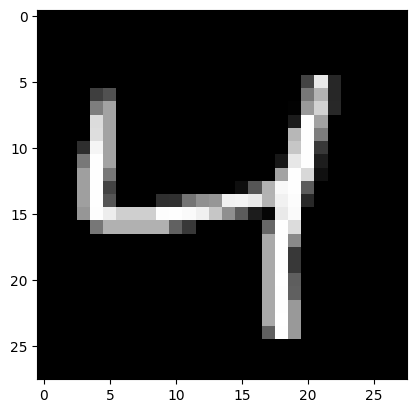

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2], cmap='gray')

In [13]:
y_train[2]

4

## 5.5 データの前処理

In [12]:
# スケーリング
x_train = x_train / 255
x_test = x_test / 255

In [15]:
display(x_train[2])
display(x_train[2].max())

array([[0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        

1.0

In [16]:
# one-hot vector
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [17]:
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

# 6章 Kerasで手書き数字（MNIST）を判定するニューラルネットワークを構築しよう #2

In [ ]:
# Flattenは入力を1次元に平坦化する層。多次元の入力（例えば画像データ）を1次元のベクトルに変換
# DenseはDense層は全結合層とも呼ばれ、ニューラルネットワークの基本的な層。この層では、すべての入力ニューロンがすべての出力ニューロンに接続される
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Flatten(input_shape=(28, 28)))

In [ ]:
model.add(Dense(32, activation="relu"))

In [ ]:
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 6.4 損失関数、最適化方法、評価指標の設定

* カテゴリー交差エントロピー誤差
    * Binary Cross-Entropy Loss
    * 機械学習、特に二値分類問題（結果が2つのクラスのいずれかに分類される問題）で広く使用される
    * 予測確率と実際のラベル（0または1）の間の差を測定
    * 予測が正解から離れるほど、誤差（損失）が大きくなる
    * 0から1の範囲の確率出力に適している
* 平均二乗誤差
    * 予測値と実際の値の差（誤差）の二乗の平均
    * 常に非負の値をとる（0が完璧な予測を意味する）
    * 大きな誤差に対してより敏感（誤差の二乗を取る）
* 最適化
    * 最適化の概要: https://qiita.com/omiita/items/1735c1d048fe5f611f80
    * 損失を早く0にするための処理が最適化
    * Adam(Adaptive Moment Estimation)
        * 学習率を適応的に調整
        * 多くの問題で良好な収束性能
    * SGD(Stochastic Gradient Descent)
        * 最も基本的な最適化アルゴリズム
        * ミニバッチごとに勾配を計算し、パラメータを更新
        * メモリ効率がよい
        * デメリット:
            * 収束が遅い場合がある
            * 学習率の設定が難しい
            * 局所的最適解に陥りやすい
    * RMSprop
        * 過去の勾配の移動平均を使って学習率を調整
        * 学習率の自動調整により、収束が速い
        * デメリット
            * Adamと比べると、一部のタスクでは性能が劣る場合がある

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics="accuracy")

## 6.5 ニューラルネットワークの学習

* バリデーションデータとは
    * バリデーションデータとは、学習プロセスにおいて、適切なハイパーパラメータを選定するために利用されるデータです。学習データやテストデータとは異なる役割を持ちます。
    * https://carbgem.com/%E3%80%90%E3%83%9B%E3%83%AF%E3%82%A4%E3%83%88%E3%83%9A%E3%83%BC%E3%83%91%E3%83%BC%E3%80%91deeplearning-%E4%B8%8A%E7%B4%9A%E7%B7%A8/

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3826 - accuracy: 0.8931 - val_loss: 0.2028 - val_accuracy: 0.9427
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2117 - accuracy: 0.9386 - val_loss: 0.1565 - val_accuracy: 0.9577
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1647 - accuracy: 0.9520 - val_loss: 0.1322 - val_accuracy: 0.9633
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1375 - accuracy: 0.9592 - val_loss: 0.1246 - val_accuracy: 0.9645
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1185 - accuracy: 0.9650 - val_loss: 0.1197 - val_accuracy: 0.9623
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1051 - accuracy: 0.9683 - val_loss: 0.1074 - val_accuracy: 0.9662
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0932 - accuracy: 0.9718 - val_loss: 0.1121 - val_accuracy:

In [ ]:
# loss, accuracy, val_loss, val_accuracy
history.history

{'loss': [0.3825646638870239,
  0.21171934902668,
  0.1646796017885208,
  0.13745316863059998,
  0.11850076913833618,
  0.10506889224052429,
  0.09318296611309052,
  0.08446395397186279,
  0.07723770290613174,
  0.07078774273395538],
 'accuracy': [0.8931296467781067,
  0.9386110901832581,
  0.9520000219345093,
  0.9591666460037231,
  0.9650370478630066,
  0.9682592749595642,
  0.9717777967453003,
  0.9739629626274109,
  0.975944459438324,
  0.9781666398048401],
 'val_loss': [0.20284099876880646,
  0.15653114020824432,
  0.13219225406646729,
  0.12458555400371552,
  0.11967223882675171,
  0.10736801475286484,
  0.11205152422189713,
  0.10792886465787888,
  0.10663168132305145,
  0.10974185168743134],
 'val_accuracy': [0.9426666498184204,
  0.9576666951179504,
  0.9633333086967468,
  0.9645000100135803,
  0.9623333215713501,
  0.9661666750907898,
  0.968500018119812,
  0.968666672706604,
  0.9695000052452087,
  0.9681666493415833]}

In [ ]:
import pandas as pd
df = pd.DataFrame(history.history)
display(df)

,loss,accuracy,val_loss,val_accuracy
0,0.382565,0.893130,0.202841,0.942667
1,0.211719,0.938611,0.156531,0.957667
2,0.164680,0.952000,0.132192,0.963333
3,0.137453,0.959167,0.124586,0.964500
4,0.118501,0.965037,0.119672,0.962333
5,0.105069,0.968259,0.107368,0.966167
6,0.093183,0.971778,0.112052,0.968500
7,0.084464,0.973963,0.107929,0.968667
8,0.077238,0.975944,0.106632,0.969500
9,0.070788,0.978167,0.109742,0.968167


<Axes: >

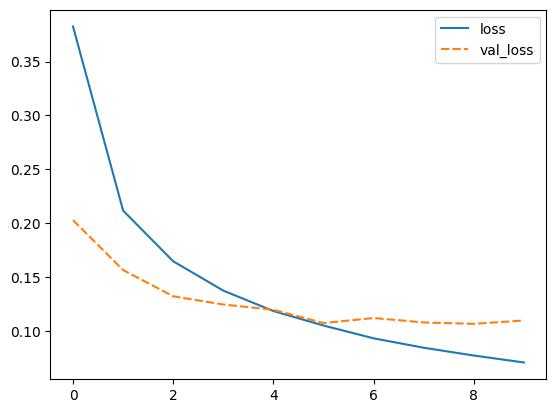

In [ ]:
import seaborn as sns
sns.lineplot(data=df[["loss", "val_loss"]])

<Axes: >

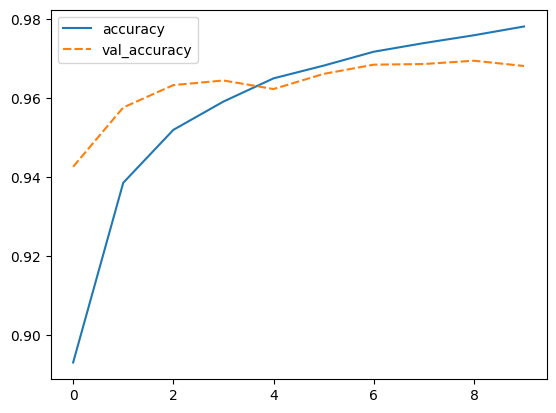

In [ ]:
sns.lineplot(data=df[["accuracy", "val_accuracy"]])

In [ ]:
# エポック数調整
utils.set_random_seed(0)

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics="accuracy")

history = model.fit(x_train, y_train,
                    batch_size=32,
                    # epoch数変更
                    epochs=7,
                    validation_split=0.1)


Epoch 1/7
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3826 - accuracy: 0.8931 - val_loss: 0.2028 - val_accuracy: 0.9427
Epoch 2/7
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2117 - accuracy: 0.9386 - val_loss: 0.1565 - val_accuracy: 0.9577
Epoch 3/7
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1647 - accuracy: 0.9520 - val_loss: 0.1322 - val_accuracy: 0.9633
Epoch 4/7
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1375 - accuracy: 0.9592 - val_loss: 0.1246 - val_accuracy: 0.9645
Epoch 5/7
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1185 - accuracy: 0.9650 - val_loss: 0.1197 - val_accuracy: 0.9623
Epoch 6/7
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1051 - accuracy: 0.9683 - val_loss: 0.1074 - val_accuracy: 0.9662
Epoch 7/7
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0932 - accuracy: 0.9718 - val_loss: 0.1121 - val_accuracy: 0.9685

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1219 - accuracy: 0.9637


[0.12194614112377167, 0.963699996471405]

## 6.7 未知データの予測

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
unknown_img = load_img("/content/drive/Othercomputers/DATACANVAS/github/learning/learning/samurai/ds_cource/19_deep_learning/unknown_mnist.png", target_size=(28, 28), color_mode="grayscale")
unknown_img

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
unknown_array = img_to_array(unknown_img)
display(unknown_array.shape)


(28, 28, 1)

In [ ]:
# x_train等の形状
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
unknown_array = unknown_array.reshape((1, 28, 28))
unknown_array.shape

(1, 28, 28)

In [ ]:
unknown_array = unknown_array / 255

In [ ]:
result = model.predict(unknown_array)
result

1/1 [==============================] - 0s 103ms/step


array([[2.7188955e-06, 1.6174318e-02, 1.0987276e-02, 9.6668899e-01, 5.4670192e-05, 3.5612102e-04, 7.7014795e-07, 2.9991625e-04, 5.3249439e-03, 1.1017068e-04]], dtype=float32)

<Axes: >

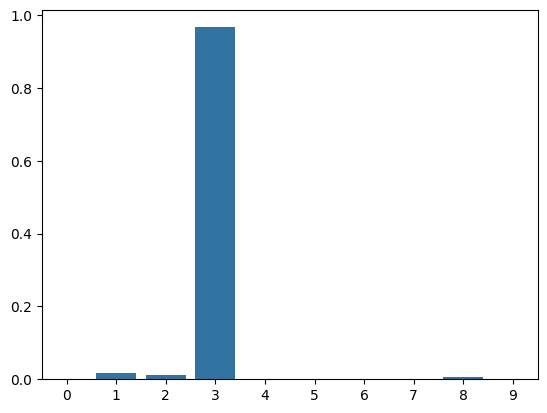

In [ ]:
sns.barplot(x=range(10), y=result[0])